In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

##### Reading Files 

In [3]:
def read_dataset():
    df = pd.read_csv("BankNote.csv")
    X = df.iloc[:,:4].values
    Y = df.iloc[:,4]
    Y = pd.get_dummies(Y)  # One Hot Encoding
    return(X,Y)

##### Shuffle the dataset to mix up the rows. Convert the dataset into train and test part and INITIALIZING VARIABLES

In [14]:
X, Y = read_dataset()
X, Y = shuffle(X, Y, random_state=1)
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=20, random_state=415)
learning_rate = .3
training_epochs = 1001  #Loops
n_features = X.shape[1]    # features in X
n_class = Y.shape[1]    #classes in y
n_hidden_1 = 60
n_hidden_2 = 60

x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_class])

##### Initializing WEIGHTS & BIASES

In [15]:
Weights = {
    'W1' : tf.Variable(tf.truncated_normal([n_features, n_hidden_1])),
    'W2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_2, n_class]))
}
biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))
}


##### Forward Propogation

In [22]:
def forward_propogation(X, Weights, biases):
    Layer1 = tf.nn.relu(tf.add(tf.matmul(X, Weights['W1']), biases['b1']))
    Layer2 = tf.nn.sigmoid(tf.add(tf.matmul(Layer1, Weights['W2']), biases['b2']))
    y_ = tf.add(tf.matmul(Layer2, Weights['out']), biases['out'])
    return y_

##### Global initializer

In [23]:
init = tf.global_variables_initializer()

##### Model

In [24]:
y_ = forward_propogation(x, Weights, biases)
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
test_log=[]
train_log=[]
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x:train_X, y:train_y})
        training_cost = sess.run(cost_function, feed_dict={x:train_X, y:train_y})
        test_cost = sess.run(cost_function, feed_dict={x:test_X, y:test_y})
        train_log.append(training_cost)
        test_log.append(test_cost)
        if(epoch%100 == 0):
            print(epoch,"  training cost",training_cost,"  test_cost",test_cost)

0   training cost 0.7620496   test_cost 0.8901936
100   training cost 0.006387897   test_cost 0.006096428
200   training cost 0.00347365   test_cost 0.0030005914
300   training cost 0.0022140362   test_cost 0.0017407238
400   training cost 0.0016938375   test_cost 0.0013146925
500   training cost 0.0013896958   test_cost 0.0010356522
600   training cost 0.0011819033   test_cost 0.0008560234
700   training cost 0.001030497   test_cost 0.0007432648
800   training cost 0.00090319547   test_cost 0.0006634215
900   training cost 0.0007992964   test_cost 0.0005988853
1000   training cost 0.00072829257   test_cost 0.00055141316


Text(0,0.5,'cost')

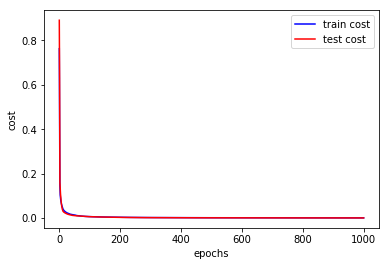

In [25]:
plt.plot(range(training_epochs), train_log, 'b')
plt.plot(range(training_epochs), test_log, 'r')
plt.legend(("train cost","test cost"))
plt.xlabel("epochs")
plt.ylabel("cost")